In [1]:
import gymnasium
import highway_env

from matplotlib import pyplot as plt
from utils import record_videos, show_videos





/Users/jonah/Desktop/ReinforcementLearning/.venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [ ]:
env = gymnasium.make('highway-fast-v0', render_mode='rgb_array',max_episode_steps=-1)
env.unwrapped.action_type.actions_indexes

Dict('achieved_goal': Box(-inf, inf, (6,), float64), 'desired_goal': Box(-inf, inf, (6,), float64), 'observation': Box(-inf, inf, (6,), float64))

In [3]:
from algorithms.Agent import Agent
from algorithms.RDQN import RDQN

# agent = TestAgent(env)


agent: Agent = RDQN(env)

In [4]:
NUM_EPISODES = 1000
total_rewards = []
discounted_rewards = []

for episode in range(NUM_EPISODES):
    print(f"Episode {episode}")
    
    total_reward = 0
    discounted_reward = 0 
    gamma_pow = 1.0       
    
    done = truncated = False
    obs, info = env.reset()
    
    while not (done or truncated):
        action = agent.predict(obs.flatten())

        next_obs, reward, done, truncated, info = env.step(action)
        
        total_reward += reward
        
        discounted_reward += reward * gamma_pow
        gamma_pow *= agent.gamma # Decay the discount factor
        
        agent.learn(obs.flatten(), action, reward, (done, next_obs.flatten()))

        obs = next_obs
        
    total_rewards.append(total_reward)
    discounted_rewards.append(discounted_reward)
    
    print(f"Total Reward: {round(total_reward, 2)} | Discounted: {round(discounted_reward, 2)}")

Episode 0


AttributeError: 'collections.OrderedDict' object has no attribute 'flatten'

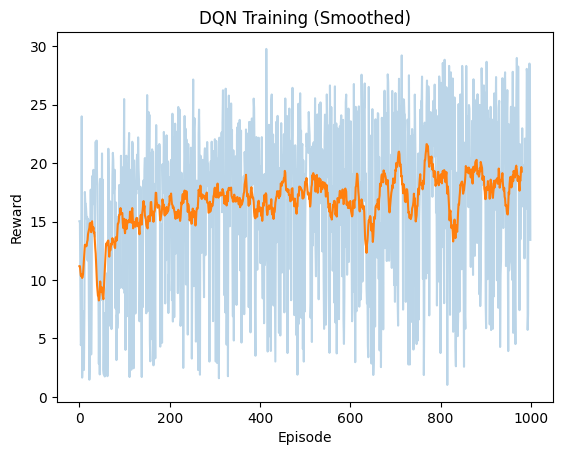

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

window = 20
smoothed = np.convolve(total_rewards, np.ones(window)/window, mode='valid')


plt.plot(total_rewards, alpha=0.3)
plt.plot(smoothed)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN Training (Smoothed)")
plt.show()

In [ ]:
NUM_EPISODES = 30
total_rewards = []
env = gymnasium.make('highway-v0', render_mode='rgb_array',config={"duration":40,"vehicles_count": 50})


for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  done = truncated = False

  obs, info = env.reset()
  
  while not (done or truncated):
    action = agent.predict(obs.flatten())

    next_obs, reward, done, truncated, info = env.step(action)
    print(info)
    obs=next_obs
    env.render()


Episode 0
{'speed': 25.0, 'crashed': False, 'action': 2, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.3333333333333333), 'high_speed_reward': np.float64(0.4944220488427259), 'on_road_reward': 1.0}}
{'speed': 29.1455588268693, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.3333333333333333), 'high_speed_reward': np.float64(0.9145267309160158), 'on_road_reward': 1.0}}
{'speed': 29.853986056331806, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.3333333333333333), 'high_speed_reward': np.float64(0.9853985573346528), 'on_road_reward': 1.0}}
{'speed': 29.975047934935745, 'crashed': False, 'action': 1, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.3333333333333333), 'high_speed_reward': np.float64(0.9975047934625906), 'on_road_reward': 1.0}}
{'speed': 25.85017715878159, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.

KeyboardInterrupt: 